# Sprint 1

## Summary

In this notebook, I used two main datasets, the Forest Inventory and Analysis (FIA) database and a field-collected dataset, to predict the Diameter at breast height (DBH) and species composition of different ecosystems based on tree heights. Specifically, I examined the relationships between tree heights and diameter at Independence Lake and Shaver Lake.


### Part 1: Exploring FIA and field data at Independence Lake

In [1]:
# Task 1 - Your code here
import folium
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
pd.set_option('display.max_columns', None)
DATA_PATH = Path("data")

In [3]:
df_plots = pd.read_csv(DATA_PATH / "01_plot_identification.csv")
df_trees = pd.read_csv(DATA_PATH / "03_tree.csv")
col = "site_name_label"
if col not in df_trees.columns:
    df_trees = df_trees.merge(df_plots[["inventory_id", col]], on="inventory_id", how="left")

In [4]:
ind_lake = df_trees[df_trees['site_name_label'] == 'Independence Lake (IND)']
ind_lake.head()

,inventory_id,tree_id,tree_tag,tree_sp,tree_sp_scientific_name,tree_sp_vernacular_name,tree_status,tree_status_label,tree_dbh,tree_firedamage,tree_burn,tree_ht,tree_htlcb,tree_resprouting,tree_decay_class,tree_decay_class_label,treepost_scorch_m,treepost_scorch_per,treepost_torch_m,treepost_torch_per,treepost_bole_char_m,tree_notes,site_name_label
240,53_pre_ind_burn3d,1,A,POTR,Populus tremuloides,NaN,Dead,Dead,30.1,NaN,False,15.0,NaN,NaN,1.0,1. All limbs and branches presents. Top pointe...,NaN,NaN,NaN,NaN,NaN,NaN,Independence Lake (IND)
241,53_pre_ind_burn3d,2,495,ABMA,Abies magnifica,NaN,Live,Live,14.4,NaN,True,4.2,1.2,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.2,NaN,Independence Lake (IND)
242,53_pre_ind_burn3d,3,496,POTR,Populus tremuloides,NaN,Live,Live,9.5,NaN,False,7.8,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Independence Lake (IND)
243,53_pre_ind_burn3d,4,497,PICO,Pinus contorta,NaN,Live,Live,53.0,NaN,False,15.0,1.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Independence Lake (IND)
244,53_pre_ind_burn3d,5,498,ABMA,Abies magnifica,NaN,Live,Live,11.8,NaN,False,4.0,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Independence Lake (IND)


In [5]:
fia_ca_plot_table = pd.read_csv(DATA_PATH / 'CA_PLOT.csv', low_memory=False)
fia_ca_tree_table = pd.read_csv(DATA_PATH / 'CA_TREE.csv', low_memory=False)
fia_ref_species_table = pd.read_csv(DATA_PATH / 'REF_SPECIES.csv')

fia_data = pd.merge(fia_ca_tree_table, fia_ca_plot_table, left_on='PLT_CN', right_on='CN')

In [6]:
spcd_to_common_name = dict(zip(fia_ref_species_table['SPCD'], fia_ref_species_table['COMMON_NAME']))
fia_data["COMMON_NAME"] = fia_data["SPCD"].map(spcd_to_common_name)

In [7]:
ind_eco = fia_data[fia_data['ECOSUBCD'] == 'M261Ej']

In [8]:
plt.style.use("default")

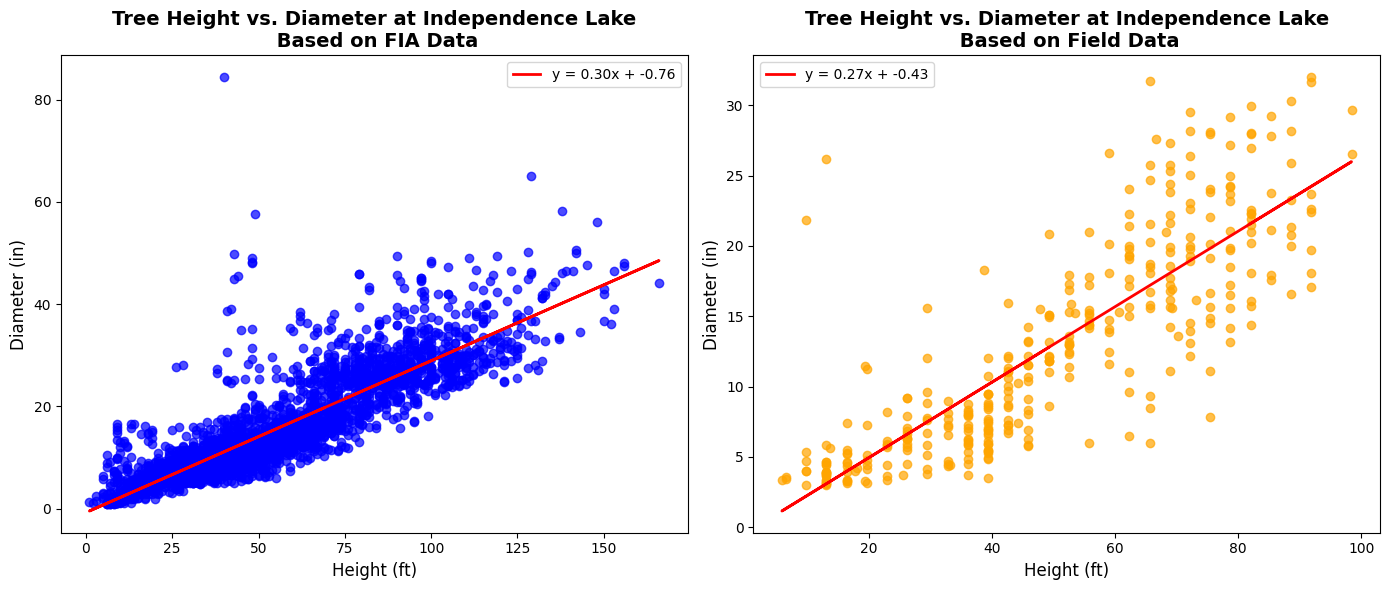

In [9]:
# Drop rows with NaN values
ind_eco_clean = ind_eco.dropna(subset=["HT", "DIA"])
ind_lake = ind_lake.copy()
ind_lake.loc[:, 'tree_ht_ft'] = ind_lake['tree_ht'] * 3.281
ind_lake.loc[:, 'tree_dbh_in'] = ind_lake['tree_dbh'] / 2.54

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First plot: ind_eco_clean
axes[0].scatter(ind_eco_clean["HT"], ind_eco_clean["DIA"], color="blue", alpha=0.7)
if not ind_eco_clean.empty:
    m1, b1 = np.polyfit(ind_eco_clean["HT"], ind_eco_clean["DIA"], 1)
    axes[0].plot(ind_eco_clean["HT"], m1 * ind_eco_clean["HT"] + b1, color='red', linestyle='-', lw=2, label=f"y = {m1:.2f}x + {b1:.2f}")

axes[0].set_title("Tree Height vs. Diameter at Independence Lake\n Based on FIA Data", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Height (ft)", fontsize=12)
axes[0].set_ylabel("Diameter (in)", fontsize=12)
axes[0].legend()

# Second plot: ind_lake
axes[1].scatter(ind_lake["tree_ht_ft"], ind_lake["tree_dbh_in"], color="orange", alpha=0.7)
if not ind_lake.empty:
    m2, b2 = np.polyfit(ind_lake["tree_ht_ft"], ind_lake["tree_dbh_in"], 1)
    axes[1].plot(ind_lake["tree_ht_ft"], m2 * ind_lake["tree_ht_ft"] + b2, color='red', linestyle='-', lw=2, label=f"y = {m2:.2f}x + {b2:.2f}")

axes[1].set_title("Tree Height vs. Diameter at Independence Lake\n Based on Field Data", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Height (ft)", fontsize=12)
axes[1].set_ylabel("Diameter (in)", fontsize=12)
axes[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()


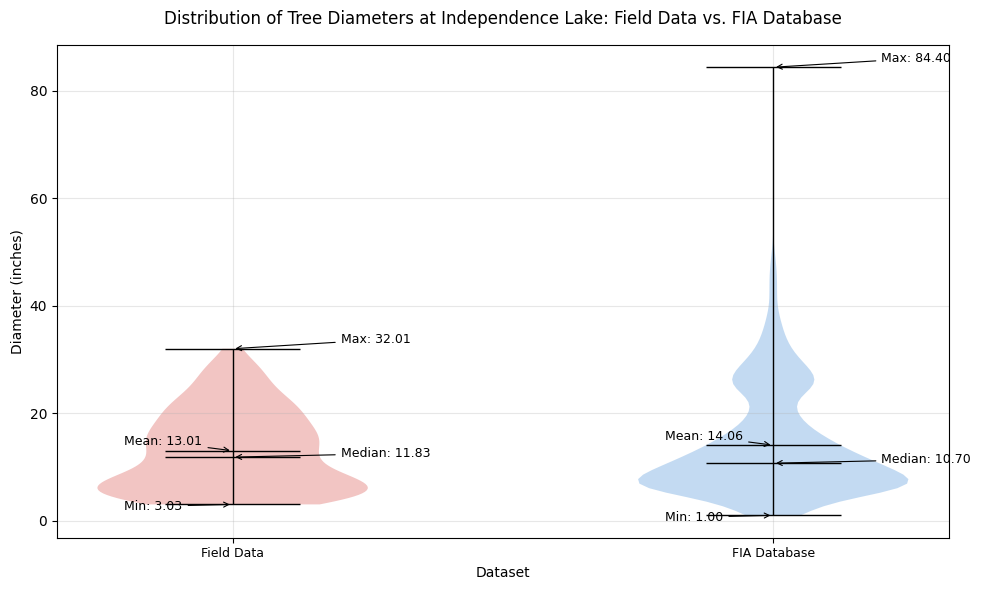

In [10]:
data1 = ind_lake['tree_dbh_in'].dropna()
data2 = ind_eco['DIA'].dropna()

plt.figure(figsize=(10, 6))
data_to_plot = [data1, data2]

violins = plt.violinplot(data_to_plot, showmeans=True, showmedians=True)

plt.title('Distribution of Tree Diameters at Independence Lake: Field Data vs. FIA Database',
          fontsize=12, pad=15)
plt.ylabel('Diameter (inches)', fontsize=10)
plt.xlabel('Dataset', fontsize=10)
plt.xticks([1, 2], ['Field Data', 'FIA Database'], fontsize=9)

# Set colors for violin bodies
violins['bodies'][0].set_facecolor('#D43F3A')
violins['bodies'][1].set_facecolor('#3A87D4')

# Customize violin plot elements
for partname in ('cbars', 'cmins', 'cmaxes', 'cmeans', 'cmedians'):
    vp = violins[partname]
    vp.set_edgecolor('black')
    vp.set_linewidth(1)

# Calculate statistics for annotations
datasets = [data1, data2]
positions = [1, 2]
for i, data in enumerate(datasets):
    median = np.median(data)
    mean = np.mean(data)
    min_val = np.min(data)
    max_val = np.max(data)

    # Annotate the points
    plt.annotate(f'Min: {min_val:.2f}', (positions[i], min_val), 
                 xytext=(positions[i] - 0.2, min_val - 1),
                 fontsize=9, arrowprops=dict(arrowstyle='->', lw=0.8))

    plt.annotate(f'Median: {median:.2f}', (positions[i], median), 
                 xytext=(positions[i] + 0.2, median),
                 fontsize=9, arrowprops=dict(arrowstyle='->', lw=0.8))

    plt.annotate(f'Mean: {mean:.2f}', (positions[i], mean), 
                 xytext=(positions[i] - 0.2, mean + 1),
                 fontsize=9, arrowprops=dict(arrowstyle='->', lw=0.8))

    plt.annotate(f'Max: {max_val:.2f}', (positions[i], max_val), 
                 xytext=(positions[i] + 0.2, max_val + 1),
                 fontsize=9, arrowprops=dict(arrowstyle='->', lw=0.8))

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


**Thoughts**: We can see that the FIA Data has a lot more datapoints than the Field Data at Independence Lake, leading to a much larger range of values for both diameter and height. However, the measures or central tendency between the two are still fairly similar as shown in the violin plot, with both distributions centering around 13-14 inches of diameter. Overall, we think that the FIA Data is certainly more detailed than the Field Data, making it more reliable for future analysis.

### Part 2: Examination of trees at Shaver Lake

In [ ]:
# Shaver Lake
shaver_lake = df_trees[df_trees['site_name_label'] == 'Shaver Lake (SHA)']
shaver_data = fia_data[fia_data['ECOSUBCD'] == 'M261Ep']
shaver_data.head()

,CN_x,PLT_CN,PREV_TRE_CN,INVYR_x,STATECD_x,UNITCD_x,COUNTYCD_x,PLOT_x,SUBP,TREE,CONDID,PREVCOND,STATUSCD,SPCD,SPGRPCD,DIA,DIAHTCD,HT,HTCD,ACTUALHT,TREECLCD,CR,CCLCD,TREEGRCD,AGENTCD,CULL,DAMLOC1,DAMTYP1,DAMSEV1,DAMLOC2,DAMTYP2,DAMSEV2,DECAYCD,STOCKING,WDLDSTEM,VOLCFNET,VOLCFGRS,VOLCSNET,VOLCSGRS,VOLBFNET,VOLBFGRS,VOLCFSND,DIACHECK,MORTYR,SALVCD,UNCRCD,CPOSCD,CLIGHTCD,CVIGORCD,CDENCD,CDIEBKCD,TRANSCD,TREEHISTCD,BHAGE,TOTAGE,CULLDEAD,CULLFORM,CULLMSTOP,CULLBF,CULLCF,BFSND,CFSND,SAWHT,BOLEHT,FORMCL,HTCALC,HRDWD_CLUMP_CD,SITREE,CREATED_DATE_x,MODIFIED_DATE_x,MORTCD,HTDMP,ROUGHCULL,MIST_CL_CD,CULL_FLD,RECONCILECD,PREVDIA,P2A_GRM_FLG,TREECLCD_NERS,TREECLCD_SRS,TREECLCD_NCRS,TREECLCD_RMRS,STANDING_DEAD_CD,PREV_STATUS_CD,PREV_WDLDSTEM,TPA_UNADJ,DRYBIO_BOLE,DRYBIO_STUMP,DRYBIO_BG,CARBON_AG,CARBON_BG,CYCLE_x,SUBCYCLE_x,BORED_CD_PNWRS,DAMLOC1_PNWRS,DAMLOC2_PNWRS,DIACHECK_PNWRS,DMG_AGENT1_CD_PNWRS,DMG_AGENT2_CD_PNWRS,DMG_AGENT3_CD_PNWRS,MIST_CL_CD_PNWRS,SEVERITY1_CD_PNWRS,SEVERITY1A_CD_PNWRS,SEVERITY1B_CD_PNWRS,SEVERITY2_CD_PNWRS,SEVERITY2A_CD_PNWRS,SEVERITY2B_CD_PNWRS,SEVERITY3_CD_PNWRS,UNKNOWN_DAMTYP1_PNWRS,UNKNOWN_DAMTYP2_PNWRS,PREV_PNTN_SRS,DISEASE_SRS,DIEBACK_SEVERITY_SRS,DAMAGE_AGENT_CD1,DAMAGE_AGENT_CD2,DAMAGE_AGENT_CD3,CENTROID_DIA,CENTROID_DIA_HT,CENTROID_DIA_HT_ACTUAL,UPPER_DIA,UPPER_DIA_HT,VOLCSSND,DRYBIO_SAWLOG,DAMAGE_AGENT_CD1_SRS,DAMAGE_AGENT_CD2_SRS,DAMAGE_AGENT_CD3_SRS,DRYBIO_AG,ACTUALHT_CALC,ACTUALHT_CALC_CD,CULL_BF_ROTTEN,CULL_BF_ROTTEN_CD,CULL_BF_ROUGH,CULL_BF_ROUGH_CD,PREVDIA_FLD,TREECLCD_31_NCRS,TREE_GRADE_NCRS,BOUGHS_AVAILABLE_NCRS,BOUGHS_HRVST_NCRS,TREECLCD_31_NERS,AGENTCD_NERS,BFSNDCD_NERS,AGECHKCD_RMRS,PREV_ACTUALHT_RMRS,PREV_AGECHKCD_RMRS,PREV_BHAGE_RMRS,PREV_HT_RMRS,PREV_TOTAGE_RMRS,PREV_TREECLCD_RMRS,RADAGECD_RMRS,RADGRW_RMRS,VOLBSGRS,VOLBSNET,SAPLING_FUSIFORM_SRS,EPIPHYTE_PNWRS,ROOT_HT_PNWRS,CAVITY_USE_PNWRS,CORE_LENGTH_PNWRS,CULTURALLY_KILLED_PNWRS,DIA_EST_PNWRS,GST_PNWRS,INC10YR_PNWRS,INC5YRHT_PNWRS,INC5YR_PNWRS,RING_COUNT_INNER_2INCHES_PNWRS,RING_COUNT_PNWRS,SNAG_DIS_CD_PNWRS,CONEPRESCD1,CONEPRESCD2,CONEPRESCD3,MASTCD,VOLTSGRS,VOLTSGRS_BARK,VOLTSSND,VOLTSSND_BARK,VOLCFGRS_STUMP,VOLCFGRS_STUMP_BARK,VOLCFSND_STUMP,VOLCFSND_STUMP_BARK,VOLCFGRS_BARK,VOLCFGRS_TOP,VOLCFGRS_TOP_BARK,VOLCFSND_BARK,VOLCFSND_TOP,VOLCFSND_TOP_BARK,VOLCFNET_BARK,VOLCSGRS_BARK,VOLCSSND_BARK,VOLCSNET_BARK,DRYBIO_STEM,DRYBIO_STEM_BARK,DRYBIO_STUMP_BARK,DRYBIO_BOLE_BARK,DRYBIO_BRANCH,DRYBIO_FOLIAGE,DRYBIO_SAWLOG_BARK,PREV_ACTUALHT_FLD,PREV_HT_FLD,CN_y,SRV_CN,CTY_CN,PREV_PLT_CN,INVYR_y,STATECD_y,UNITCD_y,COUNTYCD_y,PLOT_y,PLOT_STATUS_CD,PLOT_NONSAMPLE_REASN_CD,MEASYEAR,MEASMON,MEASDAY,REMPER,KINDCD,DESIGNCD,RDDISTCD,WATERCD,LAT,LON,ELEV,GROW_TYP_CD,MORT_TYP_CD,P2PANEL,P3PANEL,ECOSUBCD,CONGCD,MANUAL,KINDCD_NC,QA_STATUS,CREATED_DATE_y,MODIFIED_DATE_y,MICROPLOT_LOC,DECLINATION,EMAP_HEX,SAMP_METHOD_CD,SUBP_EXAMINE_CD,MACRO_BREAKPOINT_DIA,INTENSITY,CYCLE_y,SUBCYCLE_y,ECO_UNIT_PNW,TOPO_POSITION_PNW,NF_SAMPLING_STATUS_CD,NF_PLOT_STATUS_CD,NF_PLOT_NONSAMPLE_REASN_CD,P2VEG_SAMPLING_STATUS_CD,P2VEG_SAMPLING_LEVEL_DETAIL_CD,INVASIVE_SAMPLING_STATUS_CD,INVASIVE_SPECIMEN_RULE_CD,DESIGNCD_P2A,MANUAL_DB,SUBPANEL,CONDCHNGCD_RMRS,FUTFORCD_RMRS,MANUAL_NCRS,MANUAL_NERS,MANUAL_RMRS,PAC_ISLAND_PNWRS,PLOT_SEASON_NERS,PRECIPITATION,PREV_MICROPLOT_LOC_RMRS,PREV_PLOT_STATUS_CD_RMRS,REUSECD1,REUSECD2,REUSECD3,GRND_LYR_SAMPLING_STATUS_CD,GRND_LYR_SAMPLING_METHOD_CD,COMMON_NAME
37997,681824,11955,NaN,1994,6,5,19,19,1,681824,2,NaN,1,122.0,11,34.6,1.0,164.0,3.0,NaN,2.0,55.0,2.0,NaN,90.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.952,NaN,398.670013,403.890015,396.552002,401.066010,2830.399902,2929.764893,398.670013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.0,128.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-12-17 02:40:14,2024-01-30 11:59:20,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.931800,9453.263348,291.255644,3104.104027,7123.917123,1592.405366,0,NaN,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

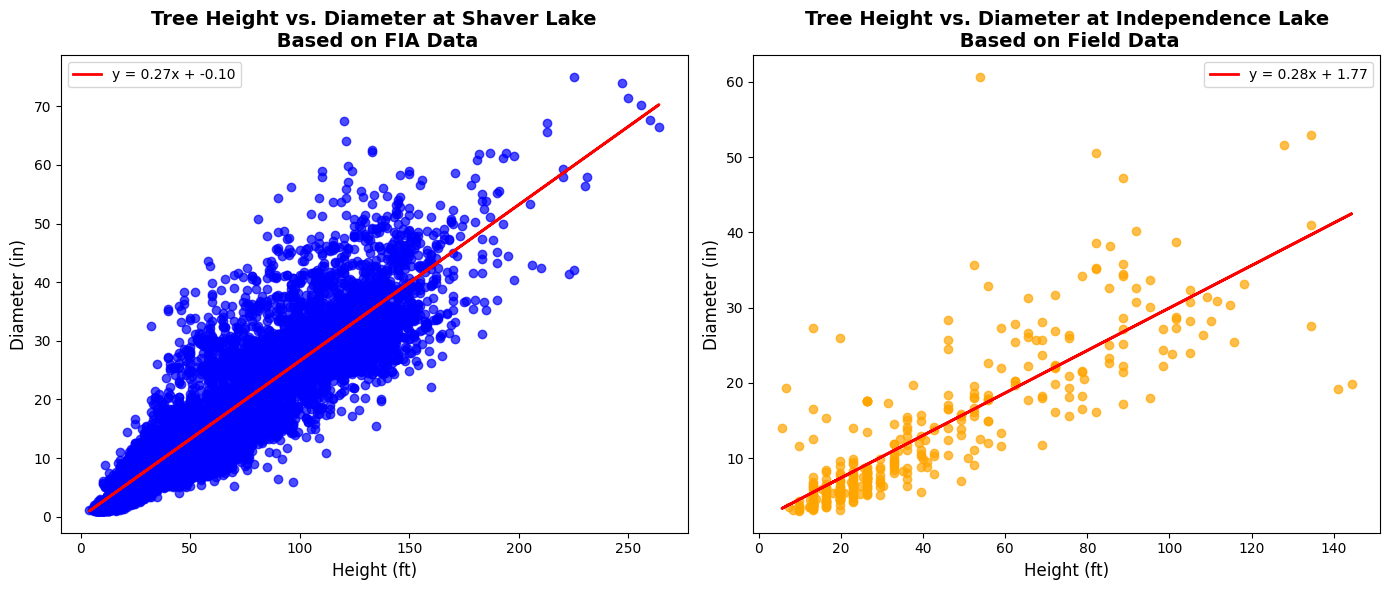

In [12]:
# Drop rows with NaN values
shaver_data = shaver_data.dropna(subset=["HT", "DIA"])
shaver_lake = shaver_lake.copy()
shaver_lake.loc[:, 'tree_ht_ft'] = shaver_lake['tree_ht'] * 3.281
shaver_lake.loc[:, 'tree_dbh_in'] = shaver_lake['tree_dbh'] / 2.54

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First plot: ind_eco_clean
axes[0].scatter(shaver_data["HT"], shaver_data["DIA"], color="blue", alpha=0.7)
if not shaver_data.empty:
    m1, b1 = np.polyfit(shaver_data["HT"], shaver_data["DIA"], 1)
    axes[0].plot(shaver_data["HT"], m1 * shaver_data["HT"] + b1, color='red', linestyle='-', lw=2, label=f"y = {m1:.2f}x + {b1:.2f}")

axes[0].set_title("Tree Height vs. Diameter at Shaver Lake\n Based on FIA Data", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Height (ft)", fontsize=12)
axes[0].set_ylabel("Diameter (in)", fontsize=12)
axes[0].legend()

# Second plot: ind_lake
axes[1].scatter(shaver_lake["tree_ht_ft"], shaver_lake["tree_dbh_in"], color="orange", alpha=0.7)
if not ind_lake.empty:
    m2, b2 = np.polyfit(shaver_lake["tree_ht_ft"], shaver_lake["tree_dbh_in"], 1)
    axes[1].plot(shaver_lake["tree_ht_ft"], m2 * shaver_lake["tree_ht_ft"] + b2, color='red', linestyle='-', lw=2, label=f"y = {m2:.2f}x + {b2:.2f}")

axes[1].set_title("Tree Height vs. Diameter at Independence Lake\n Based on Field Data", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Height (ft)", fontsize=12)
axes[1].set_ylabel("Diameter (in)", fontsize=12)
axes[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()


**Thoughts**: The relationship between tree height and diameter is slightly stronger at Independence Lake (y = 0.30x + 0.76) compared to Shaver Lake (y = 0.27x - 0.10), indicating that tree diameters increase slightly more per unit of height at Independence Lake. However, trees at Shaver Lake tend to grow taller and thicker overall, with heights exceeding 250 ft and diameters reaching 70+ inches, while those at Independence Lake remain more compact aside from a select few outliers. The wider spread in the Shaver Lake data suggests greater variability in tree growth, possibly due to environmental differences like species composition or resource availability. Despite the small difference in slope, these trends highlight how growth patterns can vary between ecosystems.


### Part 3: Better Modeling of DBH from Height at Independence Lake

In [13]:
# Task 3 - Your code here
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

ind_eco_lr = ind_eco.dropna(subset=['DIA'])

features = ["DRYBIO_STUMP", "VOLCFNET", "VOLBFNET", "CARBON_AG"]

final_lr = ind_eco_lr.dropna(subset=features)

X = final_lr[features]
y = final_lr["DIA"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Simple Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 4.72
R-squared: 0.94


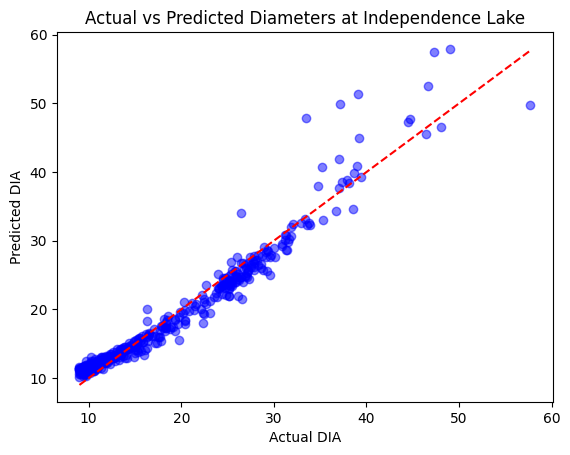

In [15]:
# Plot predictions vs actual
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line of perfect fit

plt.xlabel("Actual DIA")
plt.ylabel("Predicted DIA")
plt.title("Actual vs Predicted Diameters at Independence Lake")
plt.show()

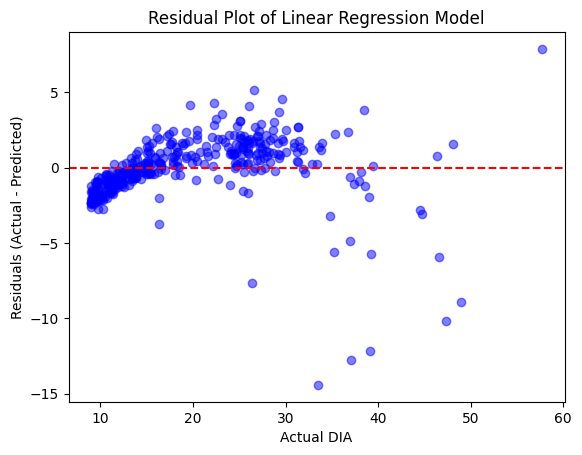

In [16]:
# Calculate residuals
residuals = y_test - y_pred

# Scatter plot of residuals
plt.scatter(y_test, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')  # Reference line at zero

plt.xlabel("Actual DIA")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot of Linear Regression Model")
plt.show()


**Thoughts**: These residuals don't look great (looks like heteroscedasticity), so let's try a different modeling approach:

Gradient Boosting Regression - MSE: 3.12, R²: 0.96


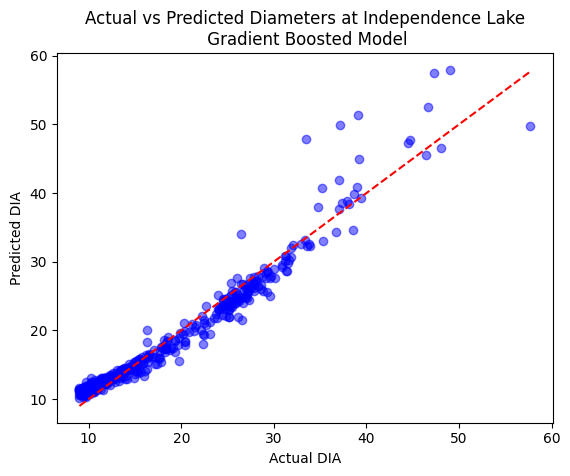

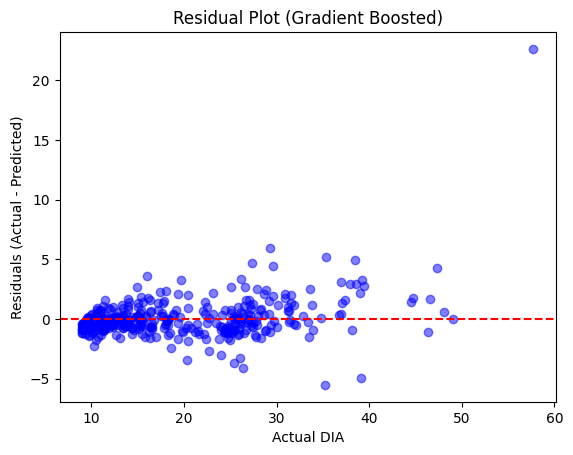

In [17]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regression
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting Regression - MSE: {mse_gb:.2f}, R²: {r2_gb:.2f}")

residuals_2 = y_test - y_pred_gb

plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line of perfect fit

plt.xlabel("Actual DIA")
plt.ylabel("Predicted DIA")
plt.title("Actual vs Predicted Diameters at Independence Lake\n Gradient Boosted Model")
plt.show()

plt.scatter(y_test, residuals_2, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual DIA")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title(f"Residual Plot (Gradient Boosted)")
plt.show()


**Thoughts**: Those look much better aside from one large outlier, and our MSE and R^2 remained promising with the Gradient Boosting.

### Part 4: Model Evaluation

RMSE: 4.39 inches


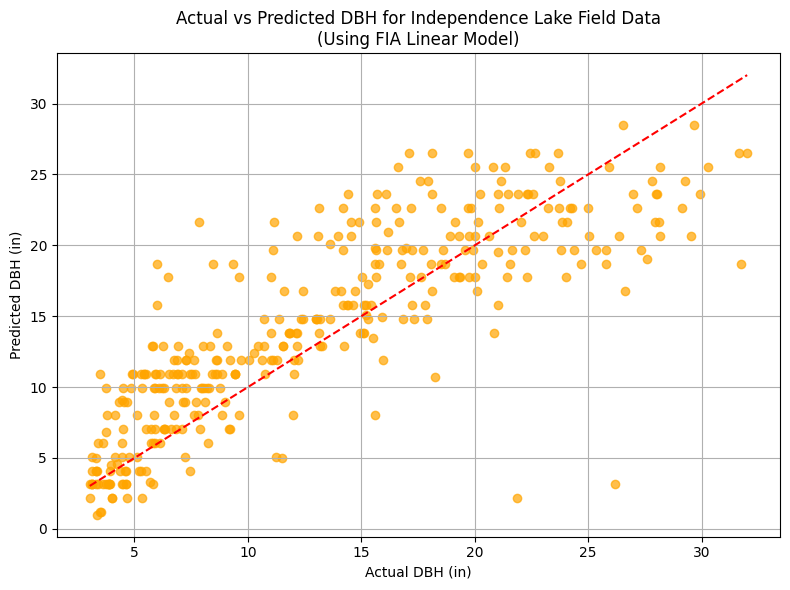

In [20]:
slope, intercept = np.polyfit(ind_eco_clean["HT"], ind_eco_clean["DIA"], 1)

# Predict DBH using Task 2 model
ind_lake["predicted_dbh"] = slope * ind_lake["tree_ht_ft"] + intercept

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(ind_lake["tree_dbh_in"], ind_lake["predicted_dbh"]))
print(f"RMSE: {rmse:.2f} inches")

# Plot actual vs. predicted
plt.figure(figsize=(8, 6))
plt.scatter(ind_lake["tree_dbh_in"], ind_lake["predicted_dbh"], alpha=0.7, color="orange")
plt.plot([ind_lake["tree_dbh_in"].min(), ind_lake["tree_dbh_in"].max()],
         [ind_lake["tree_dbh_in"].min(), ind_lake["tree_dbh_in"].max()],
         color="red", linestyle="--")
plt.xlabel("Actual DBH (in)")
plt.ylabel("Predicted DBH (in)")
plt.title("Actual vs Predicted DBH for Independence Lake Field Data\n(Using FIA Linear Model)")
plt.grid(True)
plt.tight_layout()
plt.show()

We applied the linear regression model from Task 2 (trained on FIA data using only tree height) to the field data collected at Independence Lake. Before making predictions, we converted the units in the field data so that they matched the FIA dataset:
- Tree height was converted from meters to feet.
- Tree diameter (DBH) was converted from centimeters to inches.

The predicted DBH values were then compared to the actual DBH values from the field data using RMSE (Root Mean Squared Error) as our evaluation metric. The RMSE was approximately 4.39 inches, telling us the model is fairly accurate.

**Model Limitations**:
- The model was trained on data from a large ecosystem-wide dataset (FIA), while the test set (field data) comes from a single site with potentially different species composition and measurement methods.
- The linear model only considers tree height. In reality, diameter is influenced by many other variables (e.g. species, age, competition, environmental stress).
- The field dataset is smaller, which can magnify the effect of any outliers or anomalies.

**Why we didn’t use the Gradient Boosting Model from Task 3**:
The model built in Task 3 used several features — such as `DRYBIO_STUMP`, `VOLCFNET`, and `CARBON_AG` — which are not present in the field data. Because of this mismatch in feature availability, we could not apply that model directly to the field dataset without unrealistic assumptions or imputation.

**What data would help improve our model?**
- **Species information**: Different tree species grow differently, and modeling DBH by species would likely reduce error.
- **Biomass and carbon estimates**: Including volume or carbon content improves predictions, as shown in Task 3.
- **More training data from the same site**: A site-specific model trained on past field data from Independence Lake would likely generalize better to future measurements from the same area.

In summary, while the height-only model gives a decent first approximation, adding more ecological variables and using local data would significantly enhance model accuracy.